**Prodigy Infotech**

**Data Science Internship**

### Task - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

**Coder - Satyam Raj**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Load the Online Shoppers Purchasing Intention dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
data = pd.read_csv(url)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'])

# Convert target variable 'Revenue' to binary (True: 1, False: 0)
data['Revenue'] = data['Revenue'].astype(int)

# Separate features (X) and target (y)
X = data.drop(columns=['Revenue'])
y = data['Revenue']

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2055
           1       0.58      0.57      0.57       411

    accuracy                           0.86      2466
   macro avg       0.75      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466

[[1881  174]
 [ 175  236]]


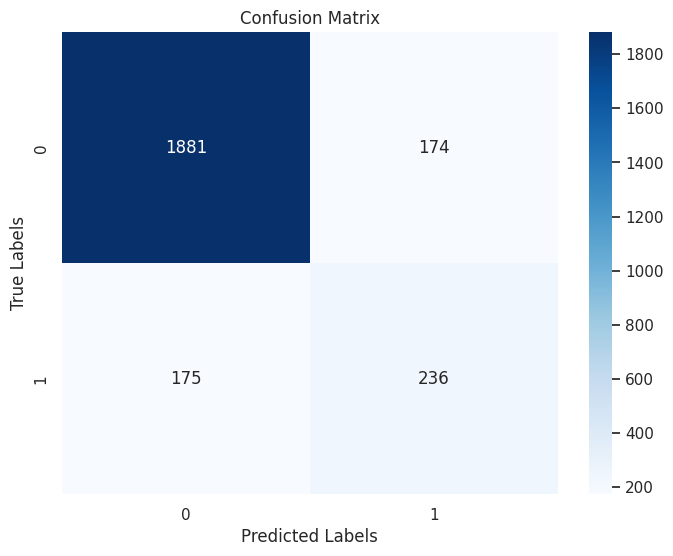

In [28]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




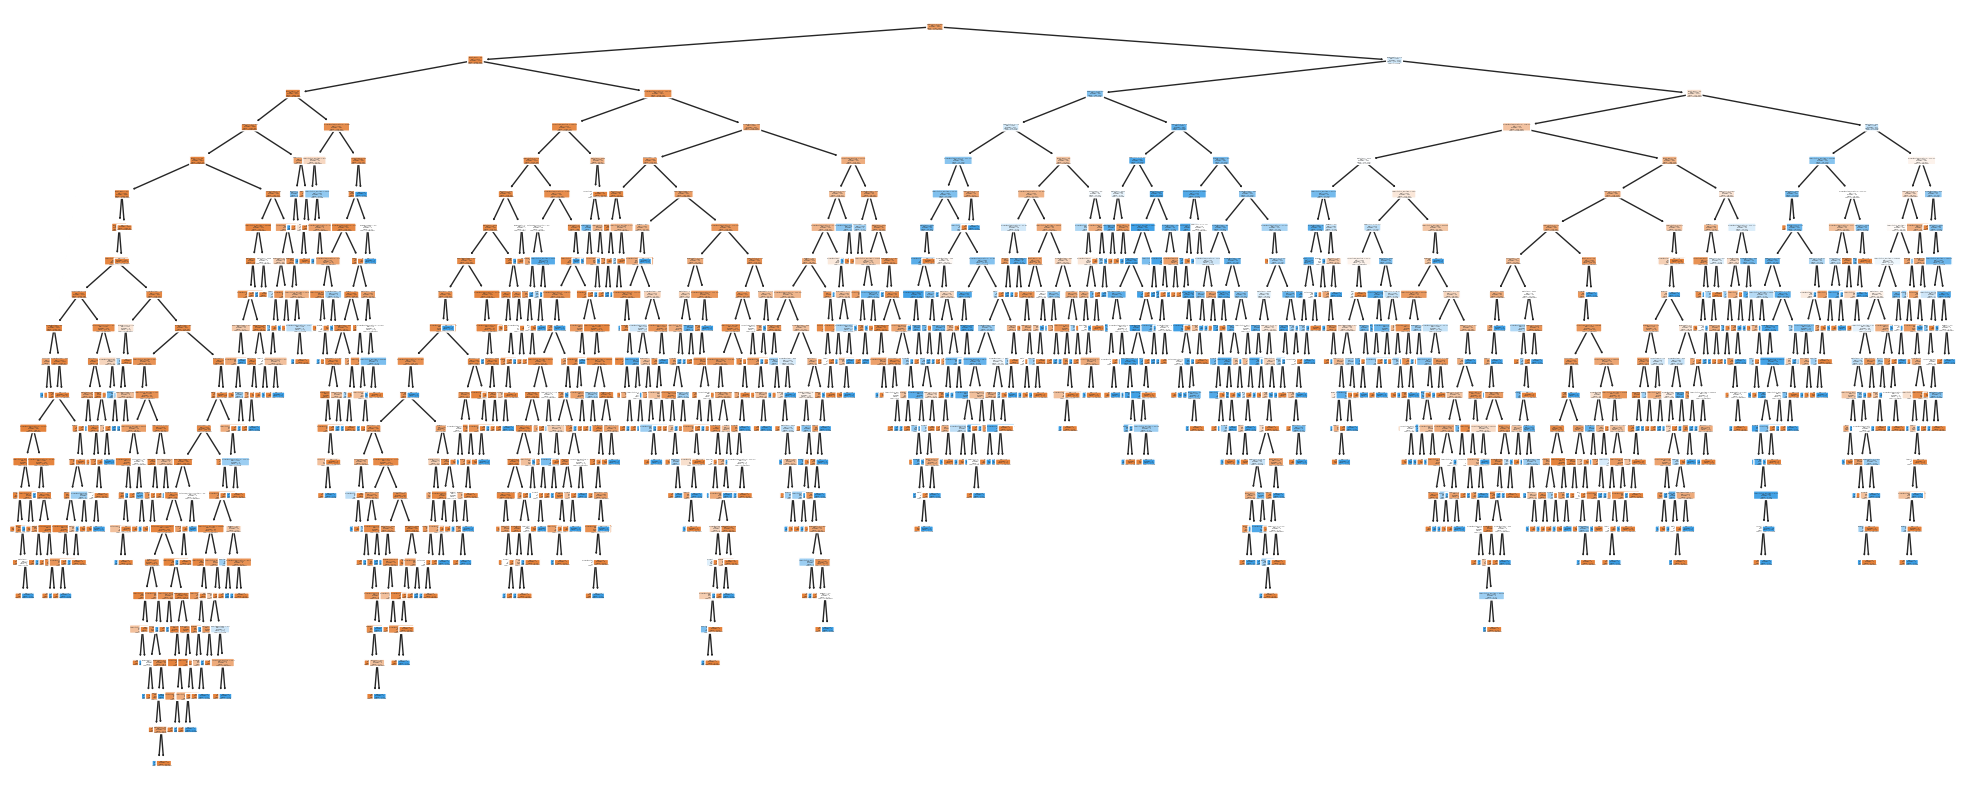

In [29]:
# Visualize the decision tree
plt.figure(figsize=(25, 10))
sns.set_theme()
plot_tree(clf, feature_names=X.columns, class_names=["No Purchase", "Purchase"], filled=True, rounded=True)
plt.show()